In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys 
import utilities as utils

# sys.path.append(r"C:\Users\K.A.C\Desktop\ITU Dersler\Image Processing\Image-Processing\Canny Edge Detector\src")

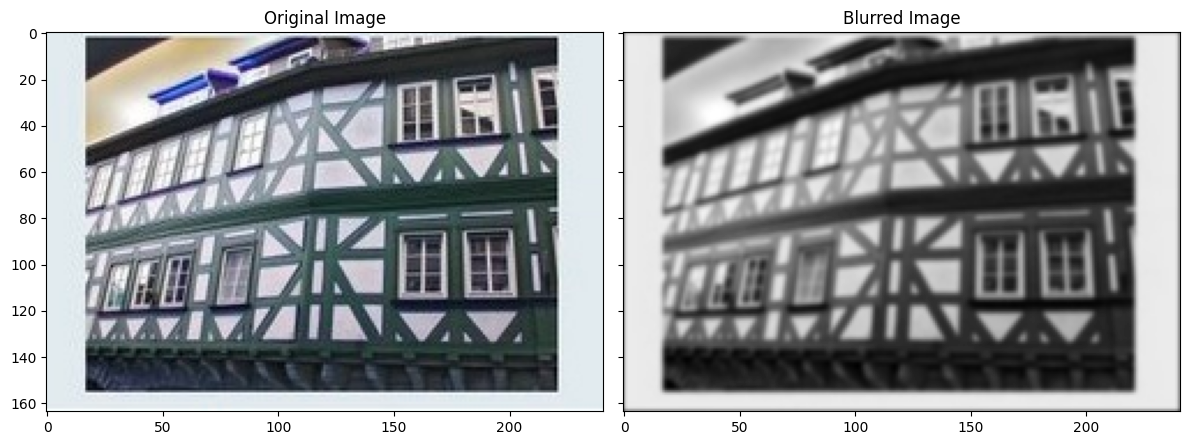

In [2]:
img = cv2.imread(r"C:\Users\K.A.C\Desktop\ITU Dersler\Image Processing\Image-Processing\Canny Edge Detector\images\house.jpg")
img_gray = utils.convert2gray(img)
gaus = utils.get1D_gaussian(1)

blur_img = utils.conv_1d(img_gray, gaus, 0)
blur_img = utils.conv_1d(blur_img, gaus, 1)

fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(12)

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(blur_img, cmap='gray')
ax[1].set_title("Blurred Image")
plt.tight_layout()
plt.show()

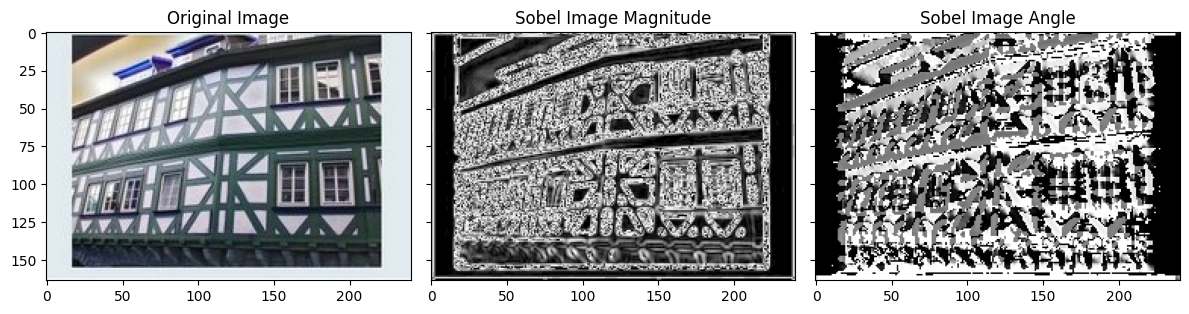

In [3]:
sob_img_G, sob_img_theta = utils.sobel_filters(blur_img)

fig, ax = plt.subplots(1, 3, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(12)

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(sob_img_G, cmap='gray')
ax[1].set_title("Sobel Image Magnitude")

ax[2].imshow(sob_img_theta, cmap='gray')
ax[2].set_title("Sobel Image Angle")

plt.tight_layout()
plt.show()

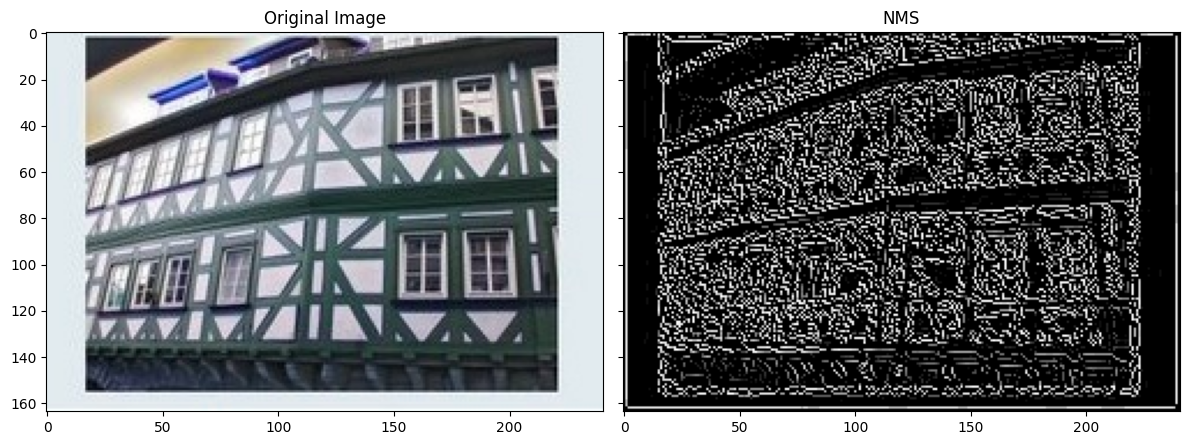

In [4]:
G_nms = utils.nms(sob_img_theta, sob_img_G)

fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(12)

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(G_nms, cmap='gray')
ax[1].set_title("NMS")

plt.tight_layout()
plt.show()

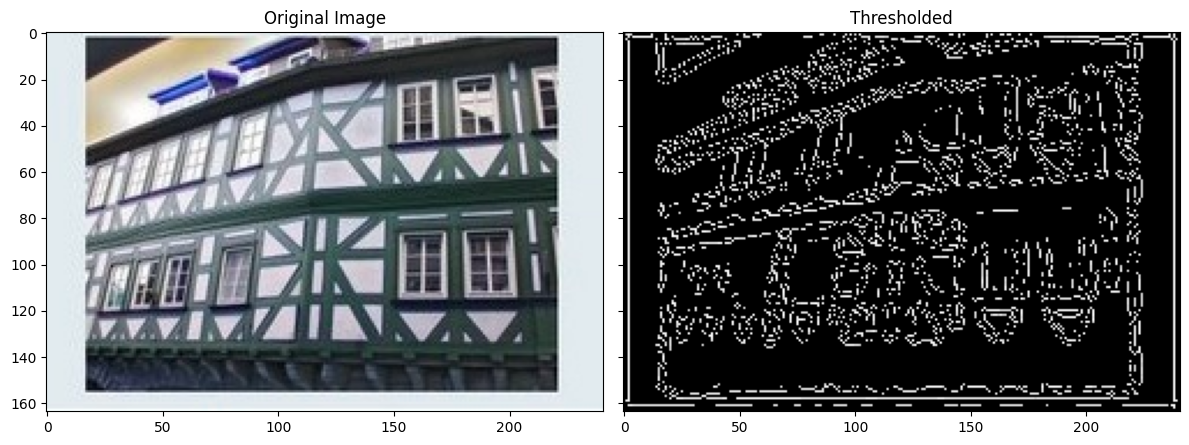

In [9]:
mask = utils.threshold(G_nms, 0.2, 0.8)
G_th = G_nms * mask

fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(12)

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(G_th, cmap='gray')
ax[1].set_title("Thresholded")

plt.tight_layout()
plt.show()

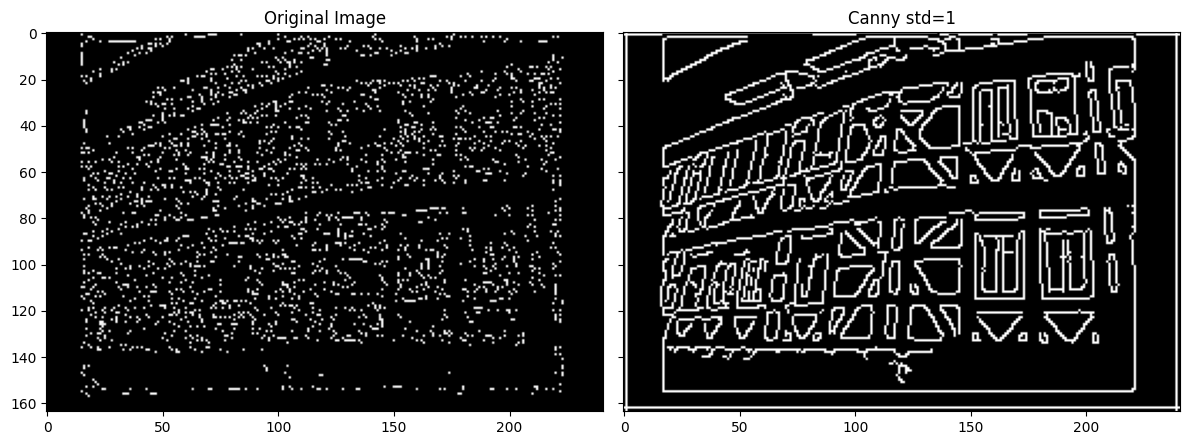

In [6]:
img_gray = utils.convert2gray(img)
gaus = utils.get1D_gaussian(1)

blur_img = utils.conv_1d(img_gray, gaus, 0)
blur_img = utils.conv_1d(blur_img, gaus, 1)

can1 = utils.Canny(blur_img, 0.1, 0.9)
can2 = cv2.Canny(blur_img, 50, 200)
fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(12)

ax[0].imshow(can1, cmap='gray')
ax[0].set_title("Original Image")

ax[1].imshow(can2, cmap='gray')
ax[1].set_title("Canny std=1")

plt.tight_layout()
plt.show()

In [10]:
def non_max_suppression_interpolation(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros_like(magnitude, dtype=np.float64)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = direction[i, j]

            # Calculate the gradient magnitudes at sub-pixel positions
            x, y = np.clip(int(np.round(i + np.cos(angle))), 0, rows-2), np.clip(int(np.round(j + np.sin(angle))), 0, cols-2)
            fx, fy = i - x, j - y
            mag1 = magnitude[x, y] * (1 - fx) * (1 - fy)
            mag2 = magnitude[x + 1, y] * fx * (1 - fy)
            mag3 = magnitude[x, y + 1] * (1 - fx) * fy
            mag4 = magnitude[x + 1, y + 1] * fx * fy

            # Check if the current pixel is a local maximum along the gradient direction
            if magnitude[i, j] >= max(mag1, mag2, mag3, mag4):
                suppressed[i, j] = magnitude[i, j]

    return suppressed

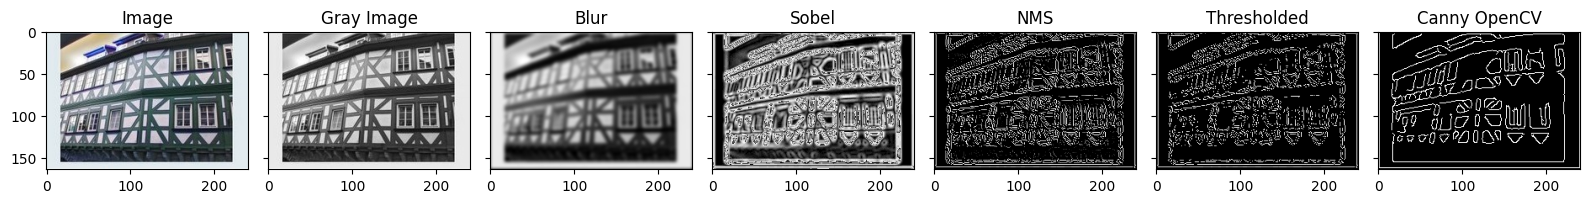

In [8]:
import utilities as utils
plot_imgs = []
img = cv2.imread(r"C:\Users\K.A.C\Desktop\ITU Dersler\Image Processing\Image-Processing\Canny Edge Detector\images\house.jpg")
plot_imgs.append(img)

img_gray = utils.convert2gray(img)
plot_imgs.append(img_gray)

gaus = utils.get1D_gaussian(2)

blur_img = utils.conv_1d(img_gray, gaus, 0)
blur_img = utils.conv_1d(blur_img, gaus, 1)
plot_imgs.append(blur_img)

sob_img_G, sob_img_theta = utils.sobel_filters(blur_img)
plot_imgs.append(sob_img_G)

G_nms = non_max_suppression_interpolation(sob_img_G, sob_img_theta)
plot_imgs.append(G_nms)

mask = utils.threshold(G_nms, 0.25, 0.75)
G_th = G_nms * mask
plot_imgs.append(G_th)

canny = cv2.Canny(blur_img, 50, 200)
plot_imgs.append(canny)

titles = ["Image", "Gray Image", "Blur","Sobel", "NMS", "Thresholded", "Canny OpenCV"]
fig, ax = plt.subplots(1, 7, sharey=True)

fig.set_figheight(8)
fig.set_figwidth(16)
for i in range(len(titles)):
    ax[i].imshow(plot_imgs[i], cmap='gray')
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()
